# This measures how many times the buyer_n-1 is not the seller_n 

In [ ]:
import pandas as pd
import io

# --- Configuration ---
# Assuming your CSV file is named 'df_table2.csv' and is in the same directory
# If it has a different name or path, change this variable:
csv_file_path = 'df_table2.csv'

# Define column names based on your example data
# Adjust if your actual CSV has different names or includes headers
column_names = ['token_id', 'transfer_from', 'transfer_to', 'event_timestamp']

# --- Code ---
mismatch_count = 0
mismatched_token_ids = []
checked_token_count = 0 # Count tokens with at least 2 transfers

try:
    # Read the CSV file
    # If your CSV has headers, use: df = pd.read_csv(csv_file_path)
    # If it does NOT have headers (like the example), use:
    df = pd.read_csv(csv_file_path)

    # Ensure timestamp is numeric for correct sorting
    df['event_timestamp'] = pd.to_numeric(df['event_timestamp'])

    # Sort values primarily by token_id and secondarily by timestamp
    df_sorted = df.sort_values(by=['token_id', 'event_timestamp'])

    # Group by token_id
    grouped = df_sorted.groupby('token_id')

    # Iterate through each group (each unique token_id)
    for token_id, group in grouped:
        # Check if there are at least two transfers for this token
        if len(group) >= 2:
            checked_token_count += 1 # Increment count of tokens checked
            # Get the first record (earliest timestamp)
            first_record = group.iloc[0]
            # Get the last record (latest timestamp)
            last_record = group.iloc[-1]

            # Extract the relevant addresses
            first_to = first_record['transfer_to']
            last_from = last_record['transfer_from']

            # Compare the addresses
            if first_to != last_from:
                mismatch_count += 1
                mismatched_token_ids.append(token_id)
                # Optional: Print details of the mismatch
                # print(f"Mismatch found for token_id: {token_id}")
                # print(f"  First transfer_to: {first_to}")
                # print(f"  Last transfer_from: {last_from}")
                # print("-" * 20)

    # --- Output ---
    print(f"Total number of unique token_ids in the dataset: {len(grouped)}")
    print(f"Number of token_ids with at least two transfers (checked): {checked_token_count}")
    print(f"\nNumber of token_ids where the last transfer_from does NOT match the first transfer_to: {mismatch_count}")

    if mismatched_token_ids:
        print("\nToken IDs with mismatches:")
        # Print first few mismatched IDs for reference
        print(mismatched_token_ids[:20]) # Adjust slice as needed
        if len(mismatched_token_ids) > 20:
             print(f"... and {len(mismatched_token_ids) - 20} more.")


except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Please ensure the CSV format is correct and column names match.")

Total number of unique token_ids in the dataset: 7774
Number of token_ids with at least two transfers (checked): 7659

Number of token_ids where the last transfer_from does NOT match the first transfer_to: 3502

Token IDs with mismatches:
[6, 13, 16, 17, 23, 25, 27, 28, 29, 32, 34, 36, 37, 38, 42, 45, 50, 51, 54, 56]
... and 3482 more.


In [ ]:
# count how many times '0x2c2ed4b3876c442fee80bee76ce0ee2ca2a512af' appears in the transfer_from column and in the transfer_to column
# and print the results
df = pd.read_csv(csv_file_path)

# In the cell with metadata id: "6f435bc7"

# count how many times '0x2c2ed4b3876c442fee80bee76ce0ee2ca2a512af' appears in the transfer_from column and in the transfer_to column
# and print the results

target_address = '0x2c2ed4b3876c442fee80bee76ce0ee2ca2a512af'

# Ensure the DataFrame 'df' exists from the previous cell
if 'df' in locals():
    # Count occurrences in 'transfer_from'
    from_count = (df['transfer_from'] == target_address).sum()

    # Count occurrences in 'transfer_to'
    to_count = (df['transfer_to'] == target_address).sum()

    print(f"Address: {target_address}")
    print(f"  Appears in 'transfer_from' column: {from_count} times")
    print(f"  Appears in 'transfer_to' column:   {to_count} times")
else:
    print("Error: DataFrame 'df' not found. Please run the previous cell first.")



Address: 0x2c2ed4b3876c442fee80bee76ce0ee2ca2a512af
  Appears in 'transfer_from' column: 69 times
  Appears in 'transfer_to' column:   65 times


In [ ]:
# read in table 1 
df_table1 = pd.read_csv('df_table1.csv')

# count how many times '0x2c2ed4b3876c442fee80bee76ce0ee2ca2a512af' appears in the buyer_n-1_sale, buyer_n_sale, seller_n-1_sale, seller_n_sale columns
# and print the results

target_address = '0x2c2ed4b3876c442fee80bee76ce0ee2ca2a512af'

# Ensure the DataFrame 'df_table1' exists from the previous cell
if 'df_table1' in locals():
    # Count occurrences in 'buyer_n-1_sale'
    buyer_n_minus_1_count = (df_table1['buyer_n-1_sale'] == target_address).sum()

    # Count occurrences in 'buyer_n_sale'
    buyer_n_count = (df_table1['buyer_n_sale'] == target_address).sum()

    # Count occurrences in 'seller_n-1_sale'
    seller_n_minus_1_count = (df_table1['seller_n-1_sale'] == target_address).sum()

    # Count occurrences in 'seller_n_sale'
    seller_n_count = (df_table1['seller_n_sale'] == target_address).sum()

    print(f"Address: {target_address}")
    print(f"  Appears in 'buyer_n-1_sale' column: {buyer_n_minus_1_count} times")
    print(f"  Appears in 'buyer_n_sale' column:   {buyer_n_count} times")
    print(f"  Appears in 'seller_n-1_sale' column: {seller_n_minus_1_count} times")
    print(f"  Appears in 'seller_n_sale' column:   {seller_n_count} times")
else:
    print("Error: DataFrame 'df_table1' not found. Please run the previous cell first.")
    


Address: 0x2c2ed4b3876c442fee80bee76ce0ee2ca2a512af
  Appears in 'buyer_n-1_sale' column: 7 times
  Appears in 'buyer_n_sale' column:   5 times
  Appears in 'seller_n-1_sale' column: 9 times
  Appears in 'seller_n_sale' column:   17 times


# address clusters 

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x105bafdd0>>
Traceback (most recent call last):
  File "/Users/miultra/Documents/Tech/Miniconda/miniconda3/envs/NFT_25/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Processing df_table2 features...
Found 13607 unique addresses in df_table2.
Processing df_table1 features...
Found 12566 unique addresses in df_table1 roles.
Combining features...
Combined features for 14547 unique addresses.
Feature columns: ['transfers_out', 'transfers_in', 'buyer_n-1_sale_count', 'buyer_n_sale_count', 'seller_n-1_sale_count', 'seller_n_sale_count']
Sample features:
                                             transfers_out  transfers_in  \
0x0000000000009703ecd0ffea3143fc9096de91b0            1.0           1.0   
0x000000000000fea5f4b241f9e77b4d43b76798a9            0.0           0.0   
0x0000000000015b23c7e20b0ea5ebd84c39dcbe60            1.0           1.0   
0x0000000000adead599c11a0c9a7475b67852c1d0            5.0           5.0   
0x00000000174b0ba12b89da994258020837ad8818            1.0           1.0   

                                            buyer_n-1_sale_count  \
0x0000000000009703ecd0ffea3143fc9096de91b0                   0.0   
0x000000000000fea5f4b241

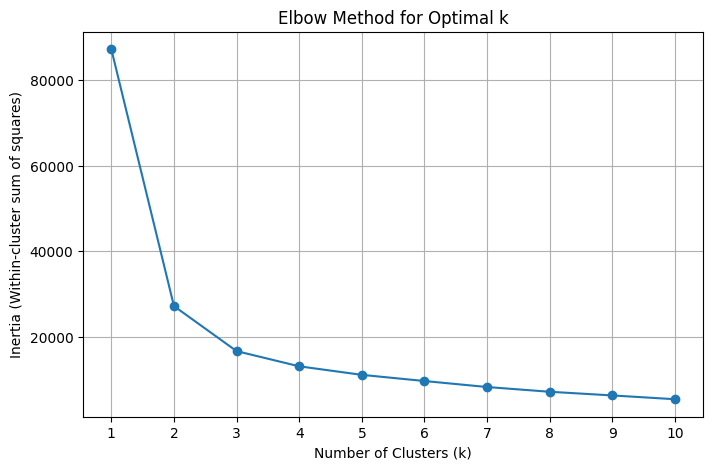


Analysis complete. 'address_features' DataFrame now contains cluster labels.


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Import silhouette_score
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# --- Configuration ---
csv_file_path_table1 = 'df_table1.csv'
csv_file_path_table2 = 'df_table2.csv'
n_clusters = 5 # Choose the desired number of clusters (can be tuned later)

# --- Load Data ---
try:
    df1 = pd.read_csv(csv_file_path_table1)
    df2 = pd.read_csv(csv_file_path_table2)
except FileNotFoundError as e:
    print(f"Error loading file: {e}")
    # Exit or handle error appropriately
    exit() # Or raise e

# --- Feature Engineering: df_table2 (Transfers) ---
print("Processing df_table2 features...")
# Get all unique addresses involved in transfers
all_addresses_df2 = pd.unique(df2[['transfer_from', 'transfer_to']].values.ravel('K'))

# Calculate transfer counts
transfer_features = pd.DataFrame(index=all_addresses_df2)
transfer_features['transfers_out'] = df2['transfer_from'].value_counts()
transfer_features['transfers_in'] = df2['transfer_to'].value_counts()
transfer_features = transfer_features.fillna(0) # Addresses might only send or only receive
print(f"Found {len(transfer_features)} unique addresses in df_table2.")

# --- Feature Engineering: df_table1 (Sales Roles) ---
print("Processing df_table1 features...")
role_cols = ['buyer_n-1_sale', 'buyer_n_sale', 'seller_n-1_sale', 'seller_n_sale']
# Get all unique addresses involved in these roles
all_addresses_df1 = pd.unique(df1[role_cols].values.ravel('K'))

# Calculate role counts
role_features = pd.DataFrame(index=all_addresses_df1)
for col in role_cols:
    role_features[f'{col}_count'] = df1[col].value_counts()
role_features = role_features.fillna(0)
print(f"Found {len(role_features)} unique addresses in df_table1 roles.")


# --- Combine Features ---
print("Combining features...")
# Combine all unique addresses from both sources
all_unique_addresses = pd.Index(all_addresses_df1).union(pd.Index(all_addresses_df2))

# Merge features using the combined index, fill missing values with 0
address_features = pd.DataFrame(index=all_unique_addresses)
address_features = address_features.join(transfer_features).join(role_features).fillna(0)

# Ensure all feature columns are numeric (handle potential non-numeric addresses if any)
address_features = address_features.apply(pd.to_numeric, errors='coerce').fillna(0)

print(f"Combined features for {len(address_features)} unique addresses.")
print("Feature columns:", address_features.columns.tolist())
print("Sample features:\n", address_features.head())


# --- Scaling ---
print("Scaling features...")
scaler = StandardScaler()
scaled_features = scaler.fit_transform(address_features)
scaled_features_df = pd.DataFrame(scaled_features, index=address_features.index, columns=address_features.columns)


# --- Clustering ---
print(f"Performing K-Means clustering with k={n_clusters}...")
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init explicitly
clusters = kmeans.fit_predict(scaled_features_df)

# Add cluster labels to the original features DataFrame
address_features['cluster'] = clusters
print("Clustering complete.")

# --- Calculate and Print Silhouette Score ---
# Ensure there's more than 1 cluster and fewer clusters than samples to calculate score
if n_clusters > 1 and n_clusters < len(scaled_features_df):
    silhouette_avg = silhouette_score(scaled_features_df, clusters)
    print(f"\nSilhouette Score for k={n_clusters}: {silhouette_avg:.4f}")
else:
    print("\nSilhouette Score cannot be calculated with the current number of clusters.")


# --- Analysis (Example: Show cluster sizes and centroids) ---
print("\n--- Cluster Analysis ---")
print("Cluster sizes:\n", address_features['cluster'].value_counts().sort_index())

# Calculate centroids (mean feature values per cluster) in the original scale
print("\nCluster Centroids (Original Scale Means):")
centroids = address_features.groupby('cluster').mean()
print(centroids)

# Optional: Elbow Method to help find optimal k
print("\nCalculating Elbow Method data...")
inertia = []
k_range = range(1, 11) # Check k from 1 to 10
for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_elbow.fit(scaled_features_df)
    inertia.append(kmeans_elbow.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("\nAnalysis complete. 'address_features' DataFrame now contains cluster labels.")

In [3]:
# Pick the cluster you want to inspect
cluster_id = 1

# All rows (addresses) in cluster 2
cluster2_df = address_features.query('cluster == @cluster_id')

# Quick peek
print(f"{len(cluster2_df)} addresses in cluster {cluster_id}")
print(cluster2_df.index.tolist()[:20])   # first 20 addresses

# If you want the full table of their features:
print(cluster2_df.head())

# If you want to sort by “activity” (e.g., total transfers + role counts):
feature_cols = [c for c in address_features.columns if c != 'cluster']
cluster2_ranked = (cluster2_df
                   .assign(activity=cluster2_df[feature_cols].sum(axis=1))
                   .sort_values('activity', ascending=False))
print(cluster2_ranked.head(10))  # top 10 most active addresses in cluster 2

# Save the addresses (and/or features) to files
cluster2_df.index.to_series().to_csv('cluster_2_addresses.txt', index=False)
cluster2_df.to_csv('cluster_2_features.csv')



1 addresses in cluster 1
['0x29469395eaf6f95920e59f858042f0e28d98a20b']
                                            transfers_out  transfers_in  \
0x29469395eaf6f95920e59f858042f0e28d98a20b         4333.0        3608.0   

                                            buyer_n-1_sale_count  \
0x29469395eaf6f95920e59f858042f0e28d98a20b                 174.0   

                                            buyer_n_sale_count  \
0x29469395eaf6f95920e59f858042f0e28d98a20b               231.0   

                                            seller_n-1_sale_count  \
0x29469395eaf6f95920e59f858042f0e28d98a20b                  945.0   

                                            seller_n_sale_count  cluster  
0x29469395eaf6f95920e59f858042f0e28d98a20b                834.0        1  
                                            transfers_out  transfers_in  \
0x29469395eaf6f95920e59f858042f0e28d98a20b         4333.0        3608.0   

                                            buyer_n-1_sale_count  \

In [10]:
address_features

,transfers_out,transfers_in,buyer_n-1_sale_count,buyer_n_sale_count,seller_n-1_sale_count,seller_n_sale_count,cluster
0x0000000000009703ecd0ffea3143fc9096de91b0,1.0,1.0,0.0,0.0,0.0,0.0,0
0x000000000000fea5f4b241f9e77b4d43b76798a9,0.0,0.0,1.0,0.0,0.0,0.0,0
0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,1.0,1.0,0.0,0.0,0.0,1.0,0
0x0000000000adead599c11a0c9a7475b67852c1d0,5.0,5.0,0.0,0.0,0.0,0.0,0
0x00000000174b0ba12b89da994258020837ad8818,1.0,1.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...
0xffe5ee430a09ba26c5bb4ab4170376c36961f0db,1.0,1.0,1.0,0.0,0.0,0.0,0
0xffe5f1ec13dc70e5a7e57a390bbf584206ad6c18,1.0,1.0,1.0,0.0,0.0,0.0,0
0xffeafbc24c7f8736d682f49d1bf3b023a39aa737,1.0,1.0,0.0,0.0,0.0,1.0,0
0xfffa6fc6acc3dbe04b175862376f1c5ff88cf9c1,2.0,2.0,0.0,0.0,0.0,1.0,0
